In [152]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2 ,os
from math import ceil
import pickle
import time
from skimage import io, feature
from skimage.color import rgb2gray

def get_images_names(path):
    files_name = os.listdir( path )
    files_name.sort()
    return files_name

def read_imges(path,images_name):
    images=[]
    for image in images_name:
        img = cv2.imread(path+image,0)
        if img is not None:
            scale_percent = 50
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            img = cv2.GaussianBlur(img, (3, 3), 0)          
            img = cv2.resize(img, dim)
            images.append(img)   
        else:
            print('Can not read image files!',path+image)
    return images

def segment_image(image):
    canny_img = cv2.Canny(image,100,200)
    return canny_img

def get_foreground(segmented_image):
    foreground_pixels = []
    foreground_value = 0
    for y in range(segmented_image.shape[0]):
        for x in range(segmented_image.shape[1]):
            if segmented_image[y, x] == foreground_value:
                foreground_pixels.append((x, y)) # add it to my list of (x, y) coordinate pairs
    return foreground_pixels

def save_fg(images):
    with open('Edge_fg_pixels.pkl', 'wb') as f:
        pickle.dump(images, f)
    
def load_fg():
    with open('Edge_fg_pixels.pkl', 'rb') as f:
        loaded_fg = pickle.load(f)
    return loaded_fg

In [153]:
path='data/test/'
#get all images name
start_time = time.time()

images_name = get_images_names(path)
images = read_imges(path,images_name)

print("--- execution time %s seconds ---" % (time.time() - start_time))

--- execution time 1.7857320308685303 seconds ---


In [154]:
seg_img=[]
start_time = time.time()

for img in images:
    seg_img.append(segment_image(img))
    
print("--- execution time: %s seconds ---" % (time.time() - start_time))

--- execution time: 0.24721527099609375 seconds ---


In [155]:
fg=[]
start_time = time.time()

for img in seg_img:
    fg.append(get_foreground(img))
print("--- execution time %s seconds ---" % (time.time() - start_time))

--- execution time 81.15313935279846 seconds ---


In [156]:
print(type(fg))
print(len(fg))

<class 'list'>
1108


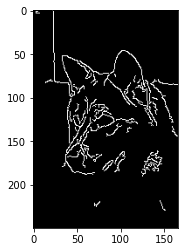

In [157]:
plt.imshow(seg_img[990],'gray')

In [158]:
start_time = time.time()
save_fg(fg)
print("--- execution time %s seconds ---" % (time.time() - start_time))

--- execution time 12.165162563323975 seconds ---
